In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


***References***

https://scholar.google.com/scholar_lookup?title=Machine%20learning%20techniques%20for%20prediction%20of%20early%20childhood%20obesity&publication_year=2015&author=T.M.%20Dugan&author=S.%20Mukhopadhyay&author=A.%20Carroll&author=S.%20Downs

https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

In [ ]:
y.head()

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
# Descriptive statistics
X.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Column Description

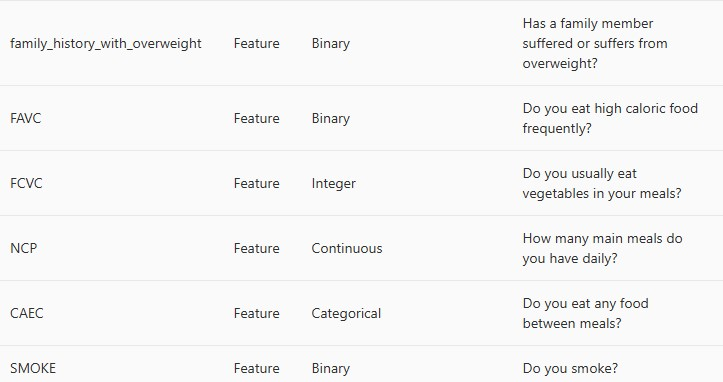

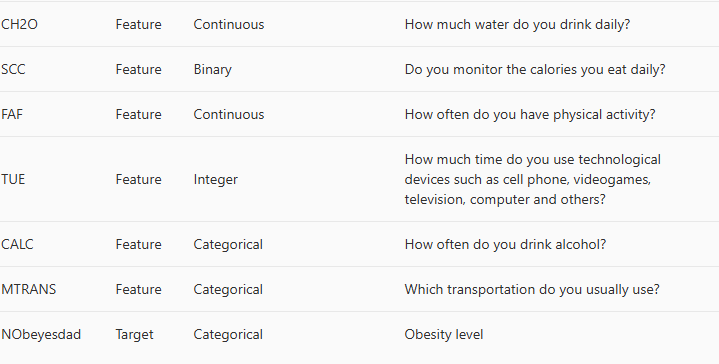

In [ ]:
X.shape

(2111, 16)

In [ ]:
y.shape

(2111, 1)

### ***EDA***

Text(0.5, 1.0, 'Obesity levels distribution')

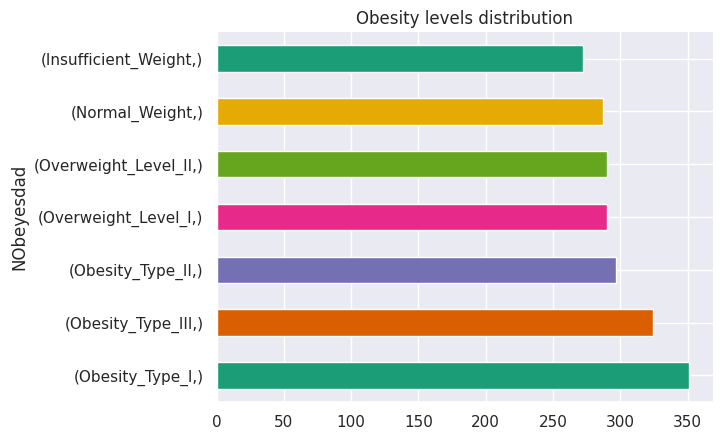

In [ ]:
# Obesity levels distribution
y.value_counts().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Obesity levels distribution')


Obesity Type 1 has high counts compared to others.This maybe as a result of high calories intake.

Text(0.5, 1.0, 'Age Distribution')

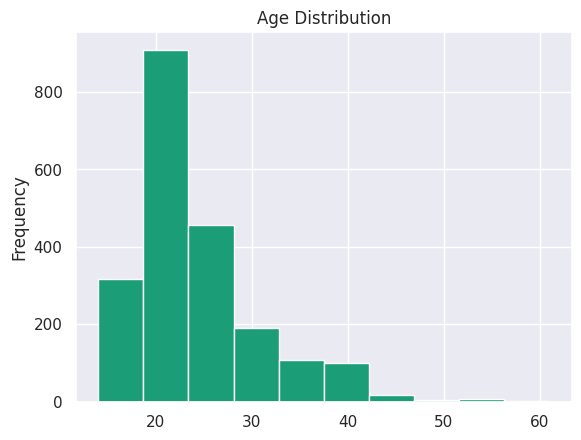

In [ ]:
# Age Distribution
X['Age'].plot(kind='hist', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Age Distribution')

Text(0.5, 1.0, 'Height Distribution')

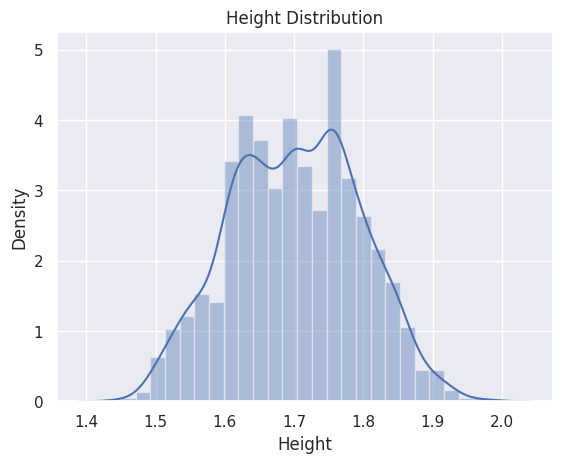

In [ ]:
# Height Distribution
sns.distplot(X['Height'])
plt.title('Height Distribution')


Text(0.5, 1.0, 'Weight Distribution')

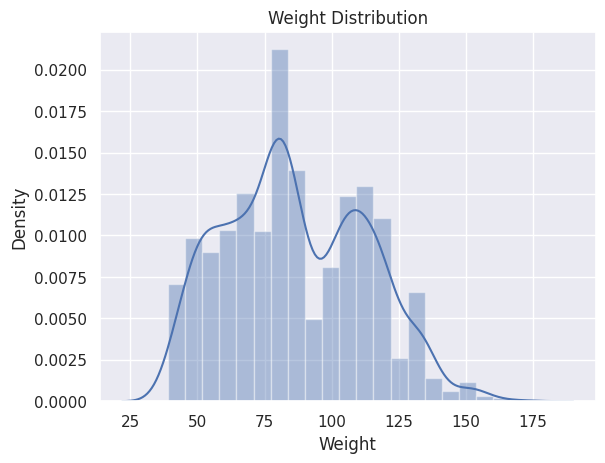

In [ ]:
# weight Distribution
sns.distplot(X['Weight'])
plt.title('Weight Distribution')

Text(0.5, 1.0, 'family history with overweight distribution')

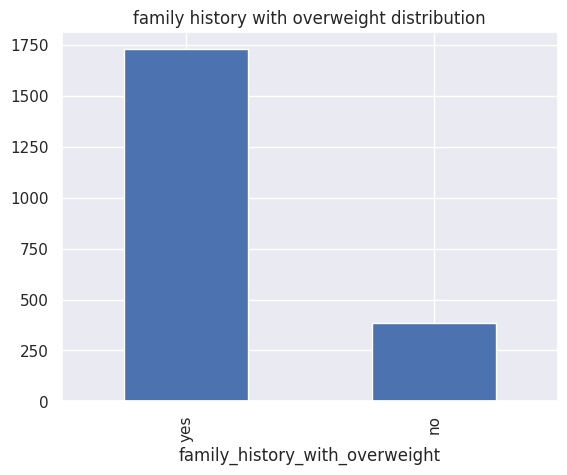

In [ ]:
# family history with overweight distribution
X['family_history_with_overweight'].value_counts().plot(kind='bar')
plt.title('family history with overweight distribution')

Text(0.5, 1.0, 'Relationship between gender and family history with overweight')

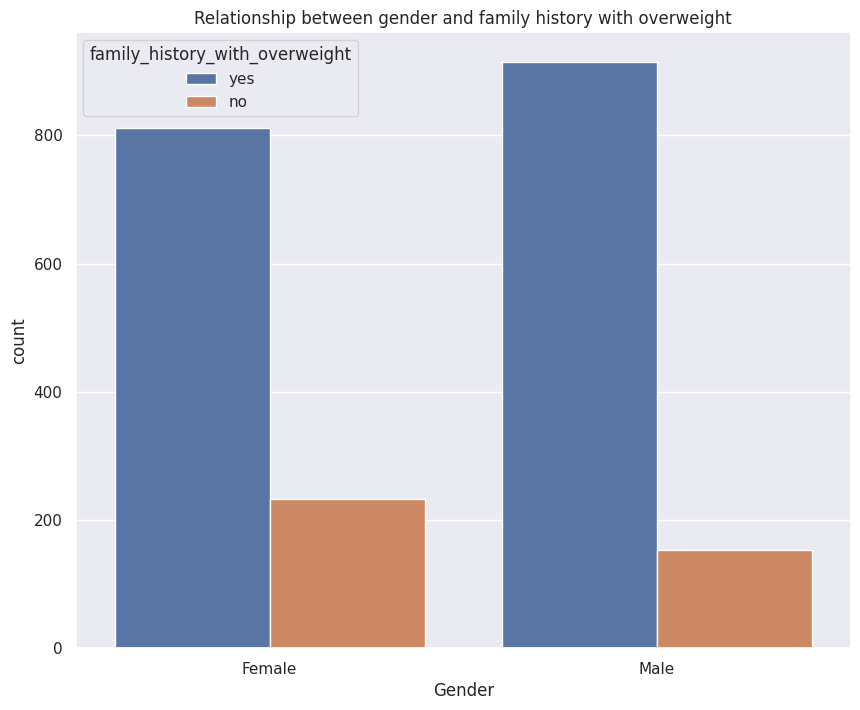

In [ ]:
# Relationship btn gender and family history with overweight
plt.figure(figsize = (10,8))
sns.countplot(x='Gender', hue='family_history_with_overweight', data=X)
plt.title('Relationship between gender and family history with overweight')

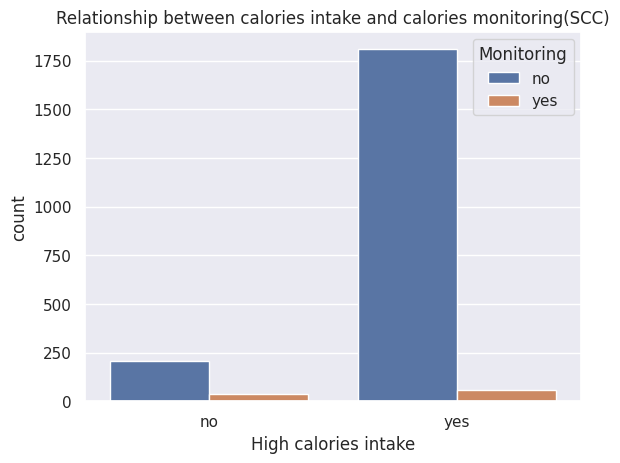

In [ ]:
# FAVC vs SCC Distribution
sns.countplot(x='FAVC', hue='SCC', data=X)
plt.title('Relationship between calories intake and calories monitoring(SCC)')
plt.xlabel('High calories intake')
plt.legend(title = 'Monitoring')

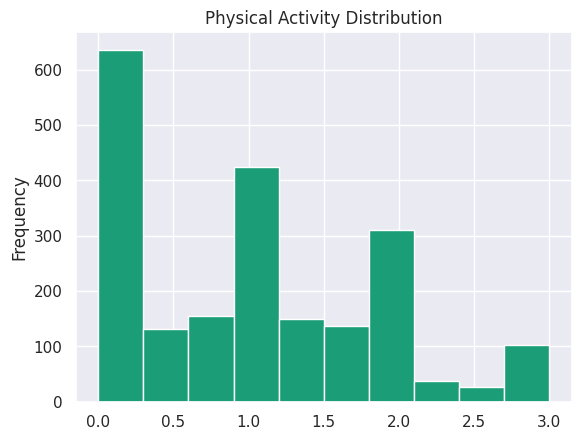

In [ ]:
# How often do you have physical activity
X['FAF'].plot(kind='hist', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Physical Activity Distribution')
plt.show()

Text(0.5, 1.0, 'Water Intake Distribution')

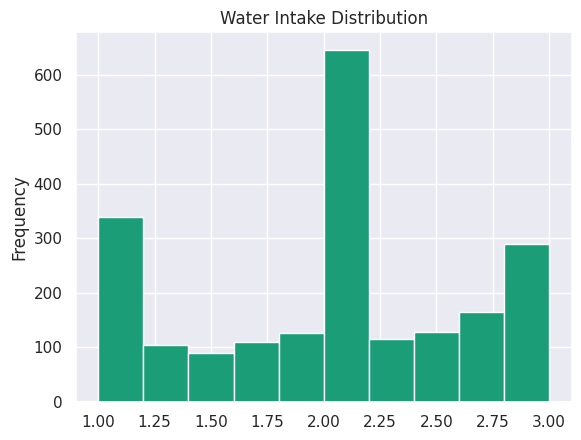

In [ ]:
# Water intake distribution
X['CH2O'].plot(kind='hist', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Water Intake Distribution')

Text(0.5, 0, 'Obesity Levels')

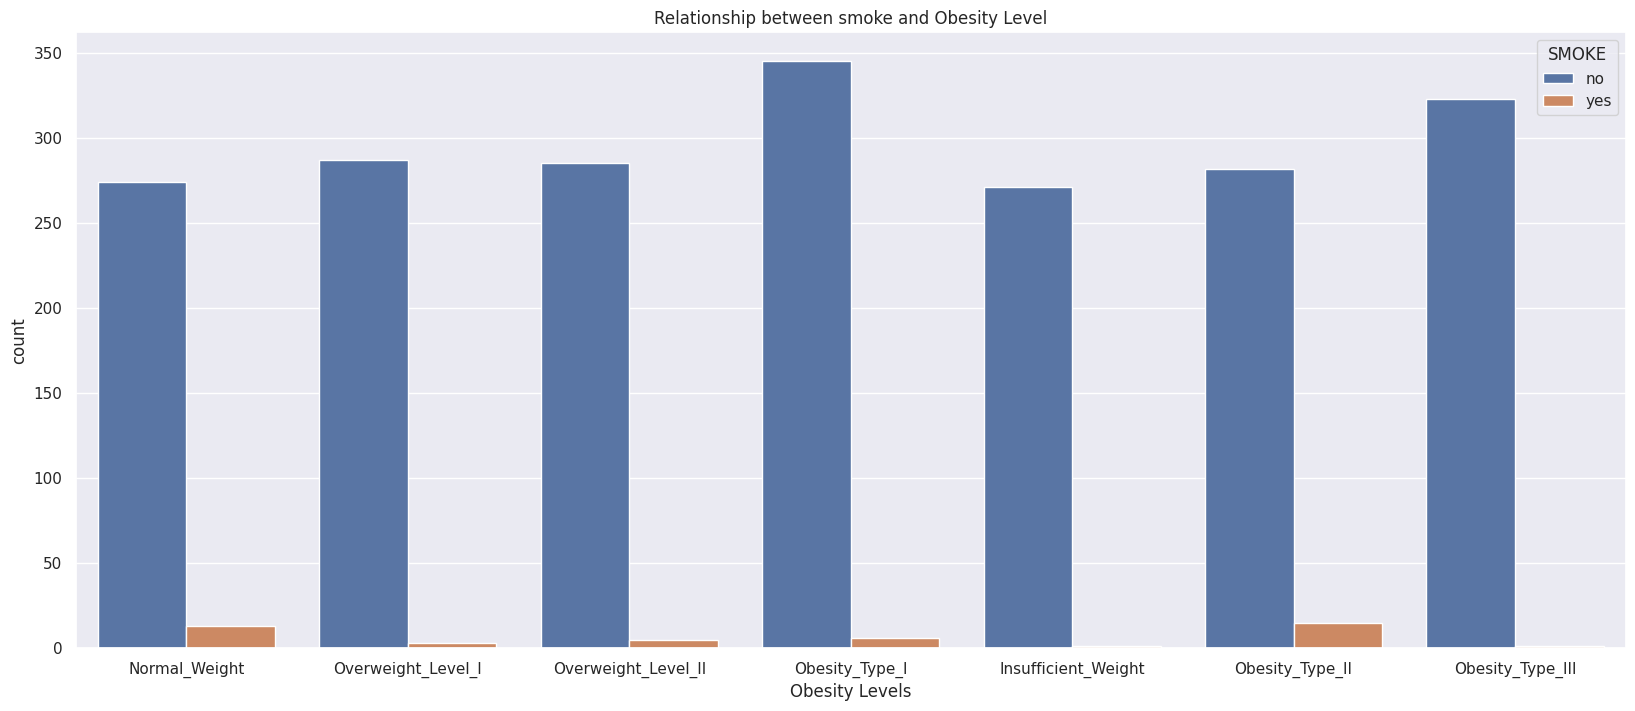

In [ ]:
# relationship between smoke and NObeysedad
plt.figure(figsize = (20,8))
sns.countplot(x = y['NObeyesdad'], hue='SMOKE',data = X)
plt.title('Relationship between smoke and Obesity Level')
plt.xlabel('Obesity Levels')

Text(0.5, 0, 'Obesity Levels')

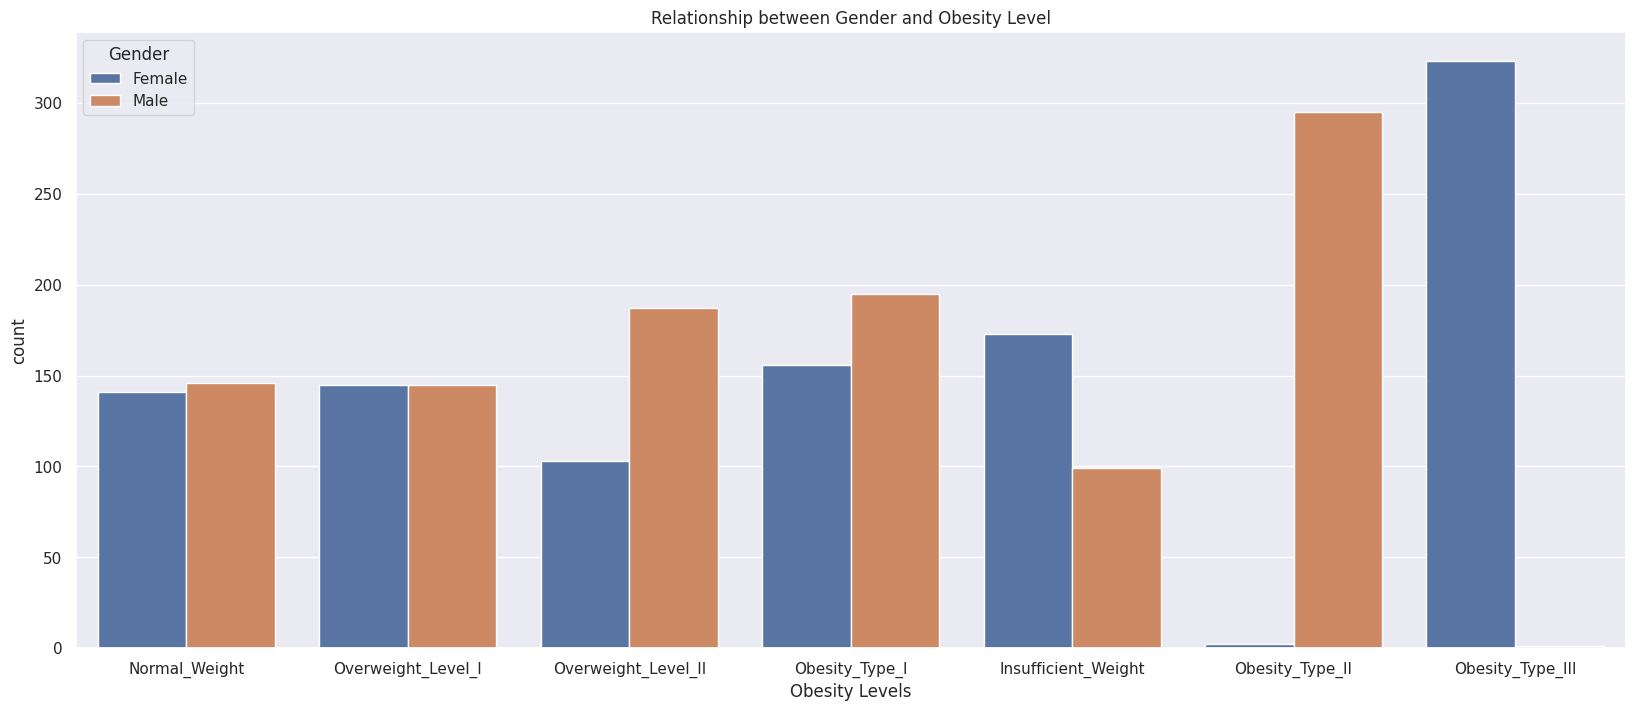

In [ ]:
# relationship between gender and NObeysedad
plt.figure(figsize = (20,8))
sns.countplot(x = y['NObeyesdad'], hue='Gender',data = X)
plt.title('Relationship between Gender and Obesity Level')
plt.xlabel('Obesity Levels')


Text(0, 0.5, 'Weight')

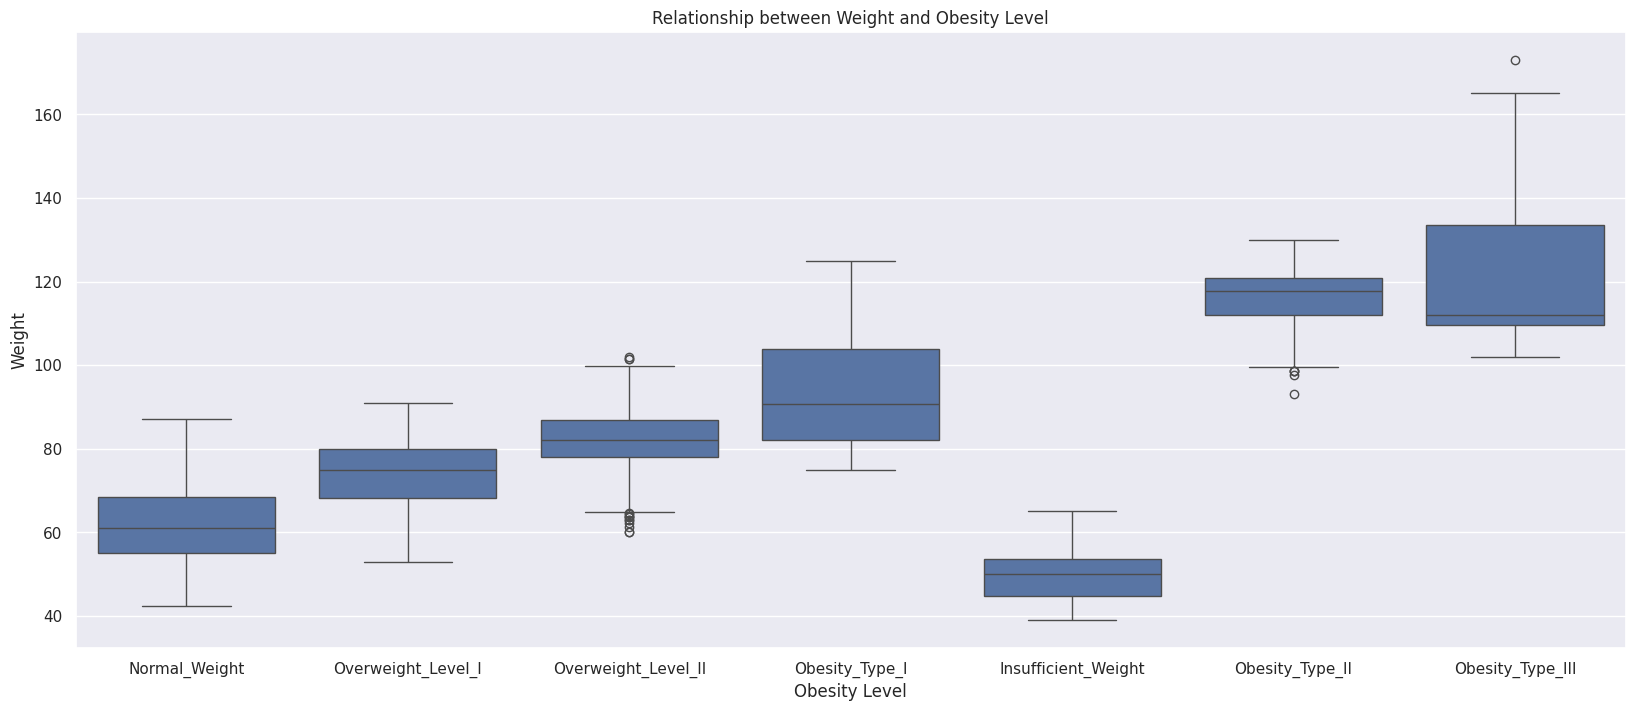

In [ ]:
# Relationship between weight and NObeyesdad
plt.figure(figsize=(20, 8))
sns.boxplot(x=y['NObeyesdad'], y=X['Weight'])
plt.title('Relationship between Weight and Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Weight')

The boxplot clearly shows a positive correlation between weight and obesity levels. As the obesity level increases, the median weight, as well as the overall range of weights, tends to increase. This indicates that higher obesity levels are generally associated with higher weights.


Text(0, 0.5, 'Age')

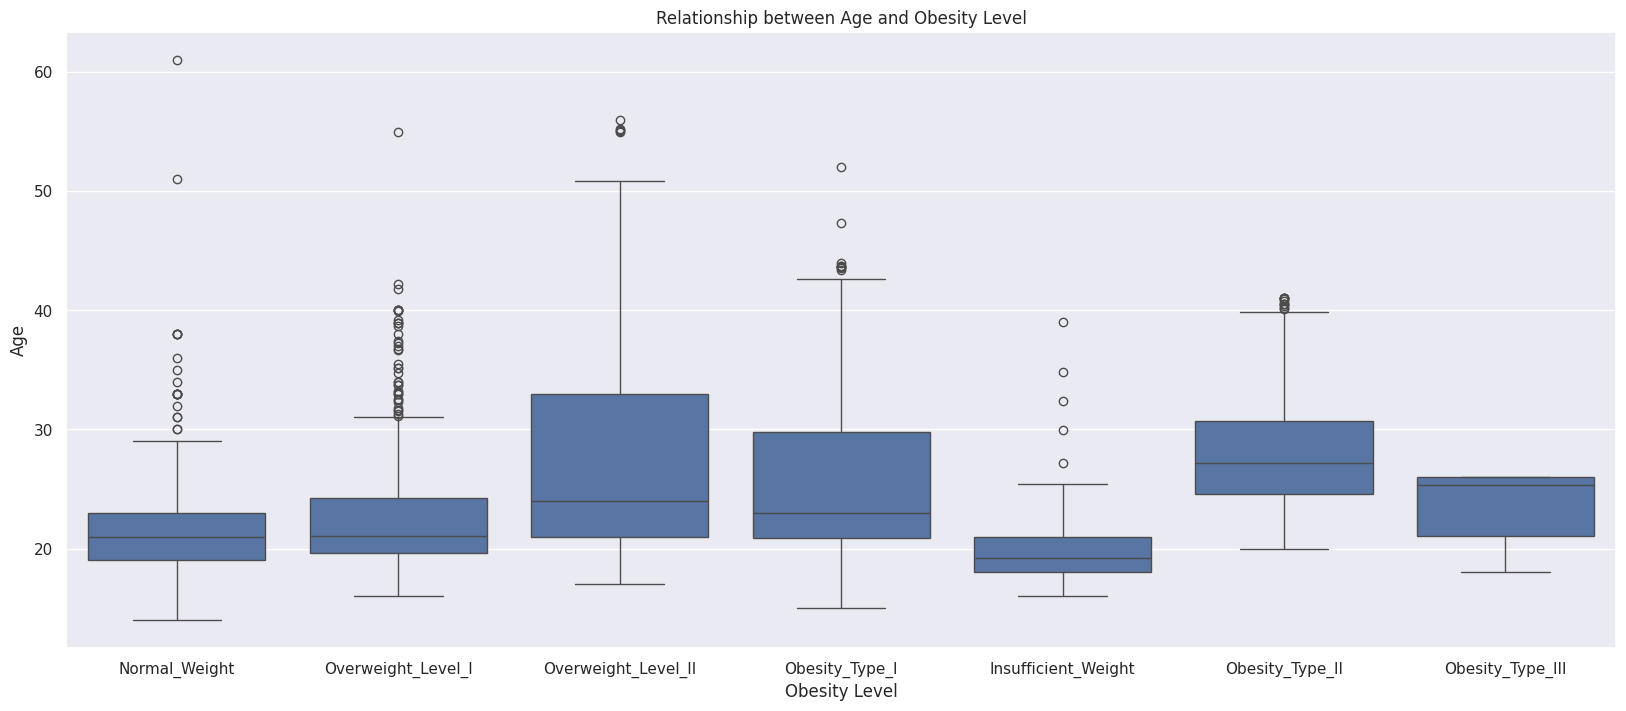

In [ ]:
# Relationship between age and NObeyesdad
plt.figure(figsize=(20, 8))
sns.boxplot(x=y['NObeyesdad'], y=X['Age'])
plt.title('Relationship between Age and Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Age')

Text(0.5, 1.0, 'Relationship between family history with overweight and obesity')

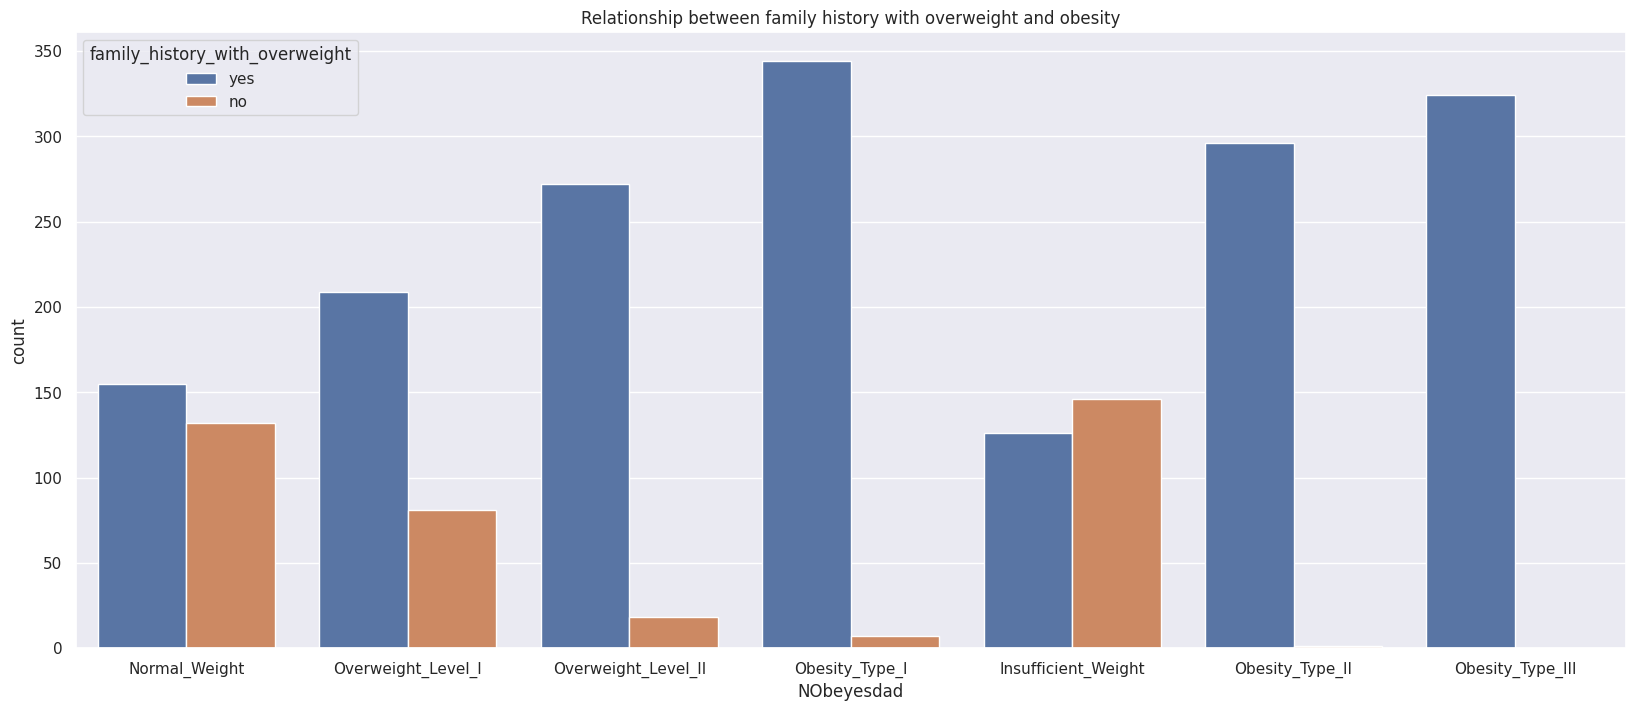

In [ ]:
# Relationship btn family history with overweight and obesity
plt.figure(figsize = (20,8))
sns.countplot(x = y['NObeyesdad'], hue='family_history_with_overweight',data = X)
plt.title('Relationship between family history with overweight and obesity')

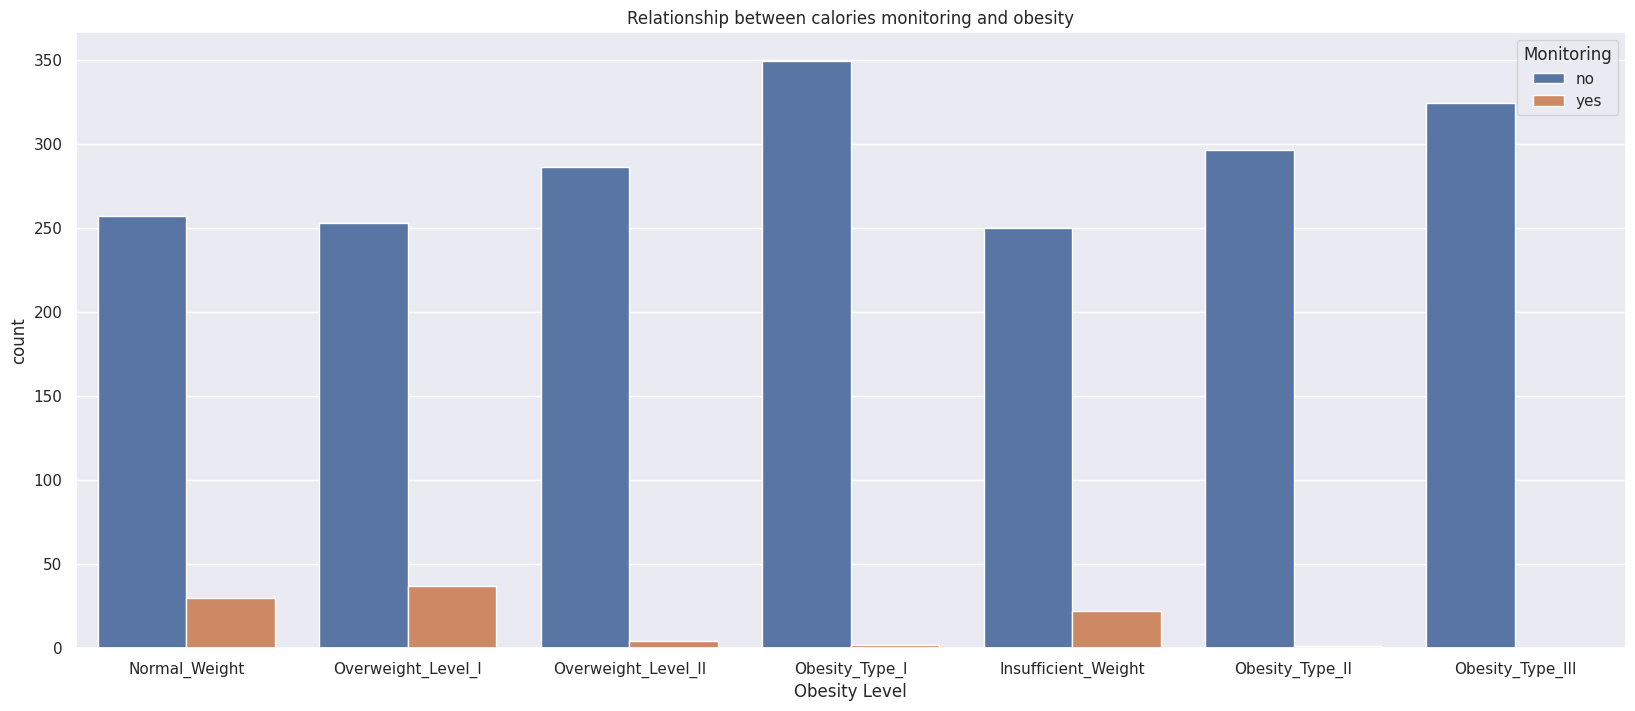

In [ ]:
# Relationship btn SCC and obesity
plt.figure(figsize = (20,8))
sns.countplot(x = y['NObeyesdad'], hue='SCC',data = X)
plt.title('Relationship between calories monitoring and obesity')
plt.xlabel('Obesity Level')
plt.legend(title = 'Monitoring')

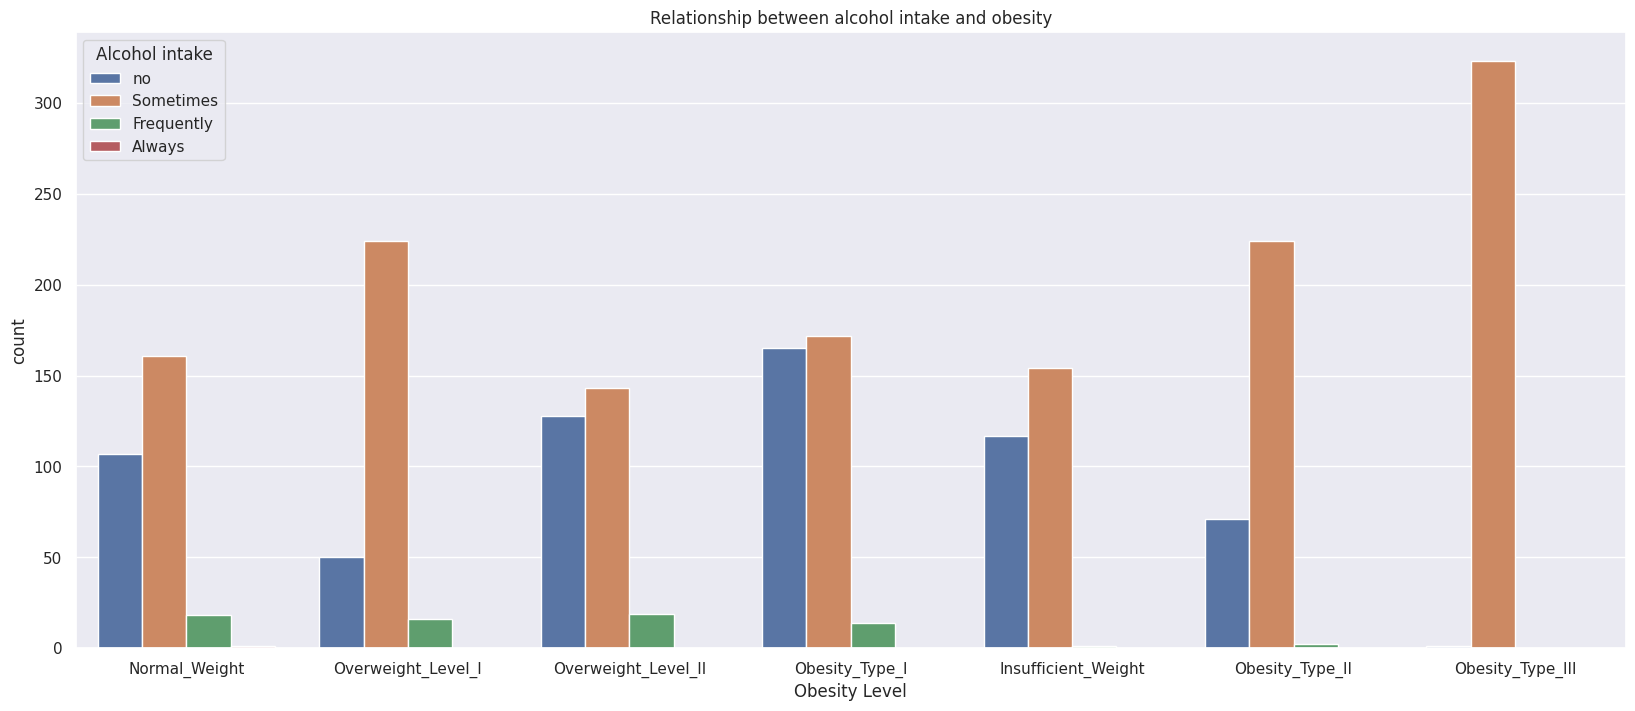

In [ ]:
# Relationship btn CALC  and obesity
plt.figure(figsize = (20,8))
sns.countplot(x = y['NObeyesdad'], hue='CALC',data = X)
plt.title('Relationship between alcohol intake and obesity')
plt.xlabel('Obesity Level')
plt.legend(title = 'Alcohol intake')

Text(0.5, 0, 'Obesity Level')

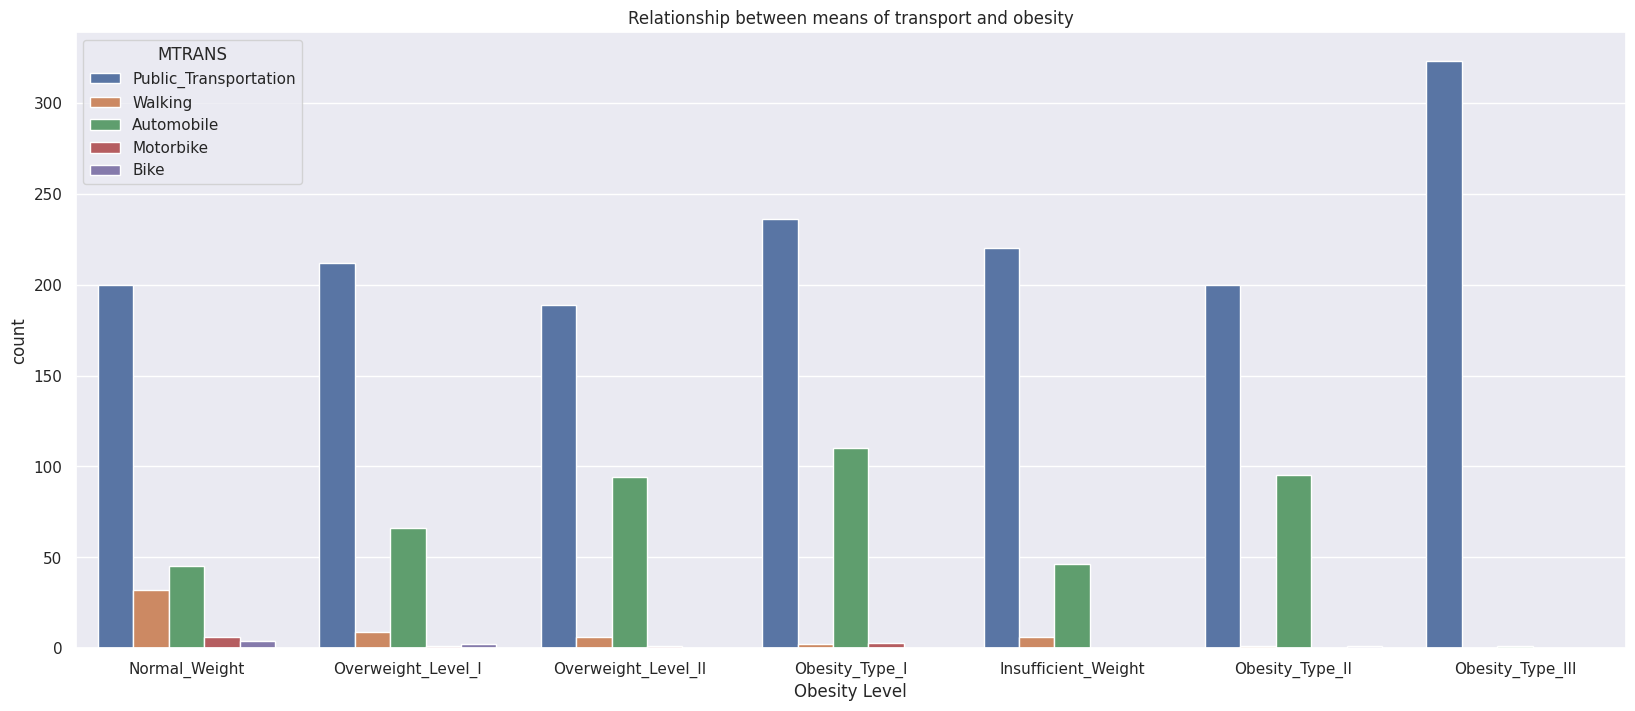

In [ ]:
# Relationship btn means of transport and obesity
plt.figure(figsize = (20,8))
sns.countplot(x = y['NObeyesdad'], hue='MTRANS',data = X)
plt.title('Relationship between means of transport and obesity')
plt.xlabel('Obesity Level')

***Problem Statement***

Obesity has emerged as a pressing global health crisis affecting individuals across all demographics and geographic regions. Defined by the World Health Organization (WHO) as a Body Mass Index (BMI) of 30 or higher, obesity has reached epidemic proportions due to a complex interplay of genetic, behavioral, environmental, and socioeconomic factors. In many countries, obesity rates have doubled or even tripled over recent decades, leading to a substantial rise in obesity-related illnesses, such as cardiovascular disease, type 2 diabetes, and certain cancers, which are now among the leading causes of premature death globally.

This issue is further caused by the high prevalence of obesity in youth populations, posing significant public health challenges. Adolescents and children who are overweight are more likely to experience obesity in adulthood, perpetuating a cycle of increased health risks and economic burdens. Moreover, obesity is strongly associated with social stigmatization, mental health issues, and decreased quality of life, impacting the well-being of individuals and communities alike.

Despite growing awareness, prevention and intervention strategies have met limited success, as the factors contributing to obesity are deeply rooted. Poor dietary habits, characterized by high-calorie and low-nutrient food consumption, and sedentary lifestyles driven by technological advances have greatly contributed to rising obesity rates. However, other factors, such as socioeconomic disparities, lack of access to healthy food options, and insufficient education on nutrition and exercise, also play significant roles.

Understanding obesity’s causes and consequences requires a data-driven approach that examines trends across various demographics, such as age, gender, income levels, and geographic regions. This analysis aims to illuminate patterns in obesity prevalence, severity, and progression over time, identifying at-risk populations and exploring the relationship between obesity and other socio-economic indicators, including income level, employment rates, and healthcare access.

By conducting this in-depth analysis, we can provide insights to support the development of targeted prevention programs and policies, ultimately contributing to the reduction of obesity rates and the improvement of population health.

### ***Data Preprocessing***

In [ ]:
# Outlier detection
from scipy import stats

# Detect outliers using Z-score
def detect_outliers_zscore(X, column, threshold=3):
    z_scores = np.abs(stats.zscore(X[column]))
    return X[z_scores > threshold]

In [ ]:
# Applying on numeric columns
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
zscore_outliers = {col: detect_outliers_zscore(X, col) for col in numeric_cols}
print("\nZ-score Outliers:")
for col, outliers in zscore_outliers.items():
    print(f"{col}: {len(outliers)} outliers")


Z-score Outliers:
Age: 24 outliers
Height: 0 outliers
Weight: 1 outliers
FCVC: 0 outliers
NCP: 0 outliers
CH2O: 0 outliers
FAF: 0 outliers
TUE: 0 outliers


In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded = X.copy()
df_encoded = pd.get_dummies(df_encoded, columns=[
    'Gender',
    'family_history_with_overweight',
    'FAVC',
    'CAEC',
    'SMOKE',
    'SCC',
    'CALC',
    'MTRANS'
], drop_first=True)

In [ ]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [ ]:
# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data into train & test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y_encoded, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8699763593380615
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        56
           1       0.91      0.63      0.74        62
           2       0.93      0.90      0.92        78
           3       0.90      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.74      0.75      0.74        56
           6       0.74      0.84      0.79        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.86       423
weighted avg       0.87      0.87      0.87       423



In [ ]:
# Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9408983451536643
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.89      0.90      0.90        62
           2       0.95      0.94      0.94        78
           3       0.93      0.95      0.94        58
           4       1.00      1.00      1.00        63
           5       0.91      0.91      0.91        56
           6       0.98      0.92      0.95        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.950354609929078
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.86      0.87      0.86        62
           2       0.99      0.96      0.97        78
           3       0.98      0.98      0.98        58
           4       1.00      1.00      1.00        63
           5       0.89      0.89      0.89        56
           6       0.96      0.98      0.97        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



In [ ]:
# Gradient boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9408983451536643
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.91      0.85      0.88        62
           2       0.97      0.91      0.94        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.87      0.93      0.90        56
           6       0.96      0.96      0.96        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



In [ ]:
# Support vector
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.933806146572104
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.84      0.87      0.86        62
           2       0.97      0.97      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.82      0.84      0.83        56
           6       0.96      0.88      0.92        50

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



Random Forest perfoms best.

Accuracy: 95.03% — This is the highest accuracy among the models.

Precision: Precision is quite high for most classes (e.g., 0.96 for class 0, 1.00 for class 4), indicating that the model is good at predicting positive cases without too many false positives.

Recall: High recall for most classes, particularly class 4 (1.00) and class 2 (0.96), meaning the model is good at identifying actual positives without missing too many.

F1-Score: Consistently high (e.g., 0.96 for class 0, 0.97 for class 2), which shows a good balance between precision and recall.

In [ ]:
# Randomized search
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist, n_iter=100, cv=5)
random_search.fit(X_train, y_train)
print(f"Best Hyperparameters: {random_search.best_params_}")


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}


In [ ]:
best_params = random_search.best_params_
# Instantiate the model with the best parameters
rf_final = RandomForestClassifier(**best_params)

# Train the model
rf_final.fit(X_train, y_train)


RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=5,
                       n_estimators=200)

In [ ]:
# Make predictions on the training set
y_train_pred = rf_final.predict(X_train)

# Evaluate performance on the training set
from sklearn.metrics import classification_report, confusion_matrix

print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

Training Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       273
           3       1.00      1.00      1.00       239
           4       1.00      1.00      1.00       261
           5       1.00      1.00      1.00       234
           6       1.00      1.00      1.00       240

    accuracy                           1.00      1688
   macro avg       1.00      1.00      1.00      1688
weighted avg       1.00      1.00      1.00      1688

[[216   0   0   0   0   0   0]
 [  0 225   0   0   0   0   0]
 [  0   0 273   0   0   0   0]
 [  0   0   0 239   0   0   0]
 [  0   0   0   0 261   0   0]
 [  0   0   0   0   0 234   0]
 [  0   0   0   0   0   0 240]]


In [ ]:
# Make predictions on the test set
y_test_pred = rf_final.predict(X_test)

# Evaluate performance on the test set
print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.85      0.90      0.88        62
           2       0.99      0.95      0.97        78
           3       0.98      0.98      0.98        58
           4       1.00      1.00      1.00        63
           5       0.89      0.88      0.88        56
           6       0.92      0.94      0.93        50

    accuracy                           0.95       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.95      0.95      0.95       423

[[54  2  0  0  0  0  0]
 [ 1 56  0  0  0  4  1]
 [ 0  1 74  1  0  0  2]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 49  1]
 [ 0  1  0  0  0  2 47]]


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_final, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.93195266 0.93786982 0.95857988 0.94362018 0.95845697]
Mean CV Score: 0.9460959036398433


In [ ]:
# 2. Test Set Evaluation
y_pred = rf_final.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_report = classification_report(y_test, y_pred)

# 3. Print Results
print(f"Test Set Accuracy: {test_accuracy}")
print("Classification Report on Test Set:")
print(test_report)

Test Set Accuracy: 0.9456264775413712
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.85      0.90      0.88        62
           2       0.99      0.95      0.97        78
           3       0.98      0.98      0.98        58
           4       1.00      1.00      1.00        63
           5       0.89      0.88      0.88        56
           6       0.92      0.94      0.93        50

    accuracy                           0.95       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.95      0.95      0.95       423



In [ ]:
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

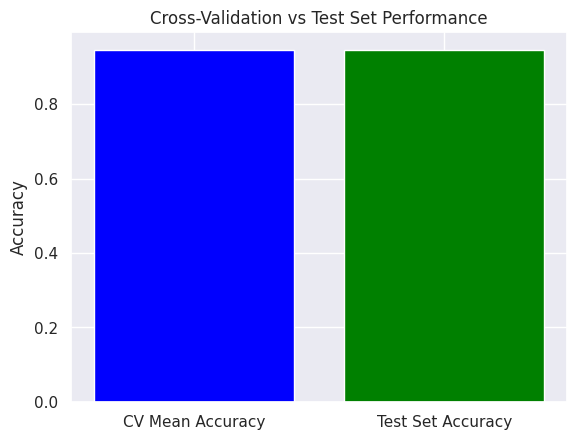

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(['CV Mean Accuracy', 'Test Set Accuracy'], [cv_mean, test_accuracy], color=['blue', 'green'])
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation vs Test Set Performance')
plt.show()

Since the cross-validation score and the test set accuracy are almost identical, it suggests that the model is generalizing well and not overfitting or underfitting.